In [22]:
import random 
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
def dice_random(n):
    count=0
    for i in range(n):
        rand=random.randint(0,6)
        if rand==1:
            count+=1
        prob=count/n
    return prob

In [3]:
Y=[]
number=1000
for i in range(1,number+1):
    Y.append(dice_random(i))
X=list(range(1, number+1))

In [4]:
probability=np.array(X)
trials=np.array(Y)
dataset=pd.DataFrame({'Probability':Y, 'Trials':X}, columns=['Probability','Trials'])
dataset

,Probability,Trials
0,1.000000,1
1,0.500000,2
2,0.000000,3
3,0.250000,4
4,0.000000,5
...,...,...
995,0.145582,996
996,0.136409,997
997,0.137275,998
998,0.165165,999


In [5]:
import seaborn as sns

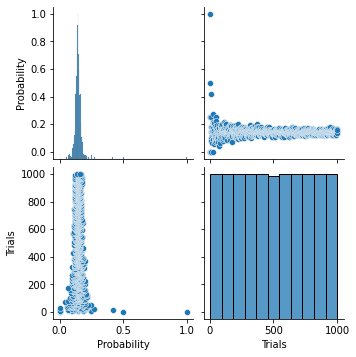

In [6]:
sns.pairplot(dataset)

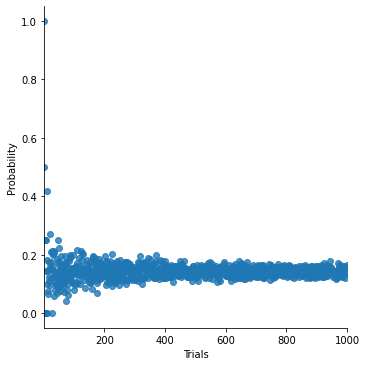

In [7]:
sns.lmplot(data=dataset, x='Trials', y='Probability')

In [8]:
X=dataset[['Trials']]
Y=dataset[['Probability']]

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
model = LinearRegression(normalize=True)
model.fit(X_train,Y_train)

LinearRegression(normalize=True)

In [12]:
model.intercept_

array([0.14942494])

In [13]:
model.coef_

array([[-9.57689141e-06]])

In [14]:
pred = model.predict(X_test)

In [15]:
model.score(X_test,Y_test)

-0.04538547139064075

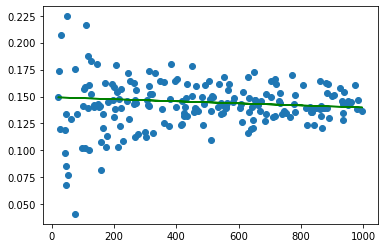

In [16]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, pred, color = 'g')

In [17]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

In [18]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [19]:
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)

In [20]:
print_evaluate(Y_train,train_pred)

MAE: 0.01814116762878758
MSE: 0.0017677192782242263
RMSE: 0.042044253807437544
R2 Square 0.0043388112769598974


In [29]:
def error_rate(a,b):
    return (abs(b-a)/abs(a))*100

In [30]:
error_rate(0.16,0.14942494)

6.609412499999998

- Predicted Probability for 6-sided Dice is 0.14942494
- Actual Probability is 0.16
- There are 6.61% error rate between experimental and actual